In [1]:
from dqn.agent import CarRacingDQN
import os
import tensorflow as tf
import gym
import _thread
import re
import sys

from car_racing_ellipse import CarRacingEllipse
from car_racing_square import CarRacingSquare
from car_racing_zigzag import CarRacingZigZag

from gym.wrappers.monitoring import Monitor

import pickle

import numpy as np
from matplotlib import pyplot as plt

test_episodes = 100

# SETTINGS

log_frames = False

record_video = True
track_type = 'Square'

# to start training from scratch:
load_checkpoint = True
if track_type=='Square':
    checkpoint_path = 'data/square_20210608'

video_path = os.path.join(checkpoint_path,'Videos')

model_config = dict(
    min_epsilon=0.1,
    max_negative_rewards=12,
    min_experience_size=int(1e4),
    num_frame_stack=1,
    frame_skip=3,
    train_freq=4,
    batchsize=64,
    epsilon_decay_steps=int(1e5),
    network_update_freq=int(1e3),
    experience_capacity=int(4e4),
    gamma=0.95
)

print(model_config)
########

if track_type == 'Square':
    env = CarRacingSquare()
if record_video:
    env = Monitor(env, video_path, force=True)

# tf.reset_default_graph()
dqn_agent = CarRacingDQN(env=env, **model_config)
dqn_agent.build_graph()
sess = tf.InteractiveSession()
dqn_agent.session = sess

saver = tf.train.Saver(max_to_keep=100)

print("loading the latest checkpoint from %s" % checkpoint_path)
ckpt = tf.train.get_checkpoint_state(checkpoint_path)
assert ckpt, "checkpoint path %s not found" % checkpoint_path
global_counter = int(re.findall("-(\d+)$", ckpt.model_checkpoint_path)[0])
saver.restore(sess, ckpt.model_checkpoint_path)
dqn_agent.global_counter = global_counter

dqn_agent.do_training = False

/home/dahlin/Desktop/Car Racing/car_racing_retry/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dahlin/Desktop/Car Racing/car_racing_retry/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dahlin/Desktop/Car Racing/car_racing_retry/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/hom

In [2]:
rewards = []
test_episodes = 4

for i in range(test_episodes):
    if track_type == 'Square':
        env = CarRacingSquare()
    if record_video:
        video_path = os.path.join(checkpoint_path,'Episode '+str(i))
        env = Monitor(env, video_path, force=False,uid='DQN Episode '+str(i))
    dqn_agent.env = env
    reward, frames, actions_out,frames_out = dqn_agent.play_episode()
    #pickle.dump(frames_out, open("frames_out"+str(dqn_agent.global_counter)+"_ref_dqn.p", "wb" ) )
    rewards.append(reward)
    print('Episode '+str(i)+' Running Mean Reward: '+str(np.mean(rewards)))
    dqn_agent.env.close()

[2021-06-09 19:30:41,304] Trying to monitor an environment which has no 'spec' set. This usually means you did not create it via 'gym.make', and is recommended only for advanced users.
[2021-06-09 19:30:41,305] Creating monitor directory data/square_20210608/Episode 0
[2021-06-09 19:30:41,308] Finished writing results. You can upload them to the scoreboard via gym.upload('/home/dahlin/Desktop/Car Racing Fixed Track/DQN-master/data/square_20210608/Videos')
Track generation: 1127..1503 -> 376-tiles track
[2021-06-09 19:30:42,106] Starting new video recorder writing to /home/dahlin/Desktop/Car Racing Fixed Track/DQN-master/data/square_20210608/Episode 0/openaigym.video.1.DQN Episode 0.video000000.mp4
[2021-06-09 19:31:45,498] Finished writing results. You can upload them to the scoreboard via gym.upload('/home/dahlin/Desktop/Car Racing Fixed Track/DQN-master/data/square_20210608/Episode 0')
[2021-06-09 19:31:45,502] Trying to monitor an environment which has no 'spec' set. This usually me

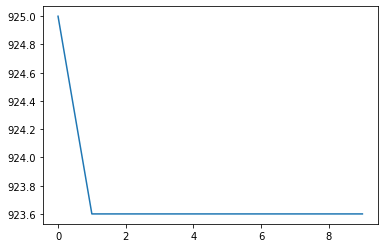

In [3]:
from matplotlib import pyplot as plt
plt.plot(rewards)

(array([ 4.,  1.,  1.,  2.,  1.,  2.,  2.,  2., 10., 75.]),
 array([226.88947368, 298.61052632, 370.33157895, 442.05263158,
        513.77368421, 585.49473684, 657.21578947, 728.93684211,
        800.65789474, 872.37894737, 944.1       ]),
 <BarContainer object of 10 artists>)

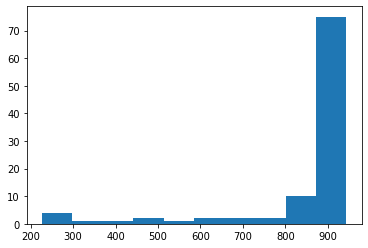

In [4]:
plt.hist(rewards)

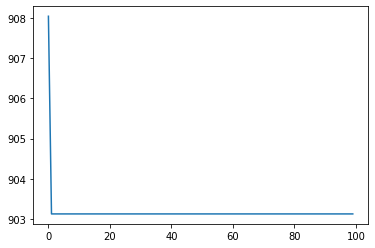

In [3]:
from matplotlib import pyplot as plt
plt.plot(rewards)

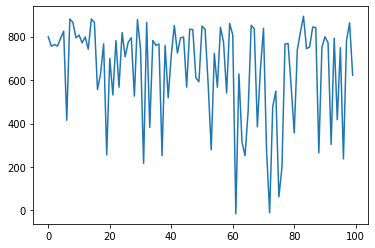

In [4]:
from matplotlib import pyplot as plt
plt.plot(rewards)

(array([ 3.,  0.,  6.,  5.,  5.,  4., 11.,  6., 35., 25.]),
 array([-15.78648649,  75.1456154 , 166.07771729, 257.00981917,
        347.94192106, 438.87402294, 529.80612483, 620.73822672,
        711.6703286 , 802.60243049, 893.53453237]),
 <BarContainer object of 10 artists>)

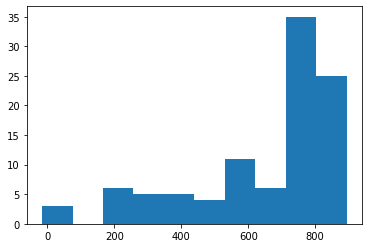

In [5]:
plt.hist(rewards)

(array([ 2.,  7.,  0.,  8., 11.,  8.,  8.,  8., 31., 17.]),
 array([  2.4739726 ,  93.56647154, 184.65897047, 275.7514694 ,
        366.84396834, 457.93646727, 549.0289662 , 640.12146514,
        731.21396407, 822.306463  , 913.39896194]),
 <BarContainer object of 10 artists>)

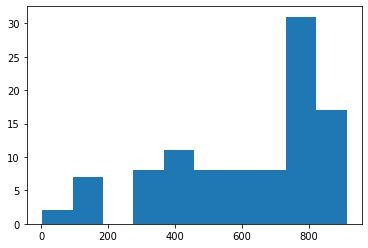

In [4]:
plt.hist(rewards)